Generating 500 well-distributed random data points...
Generated 500 data points in 2 dimensions.
Targeting K = 3 clusters.
Initial centroids selected randomly from data's value range.


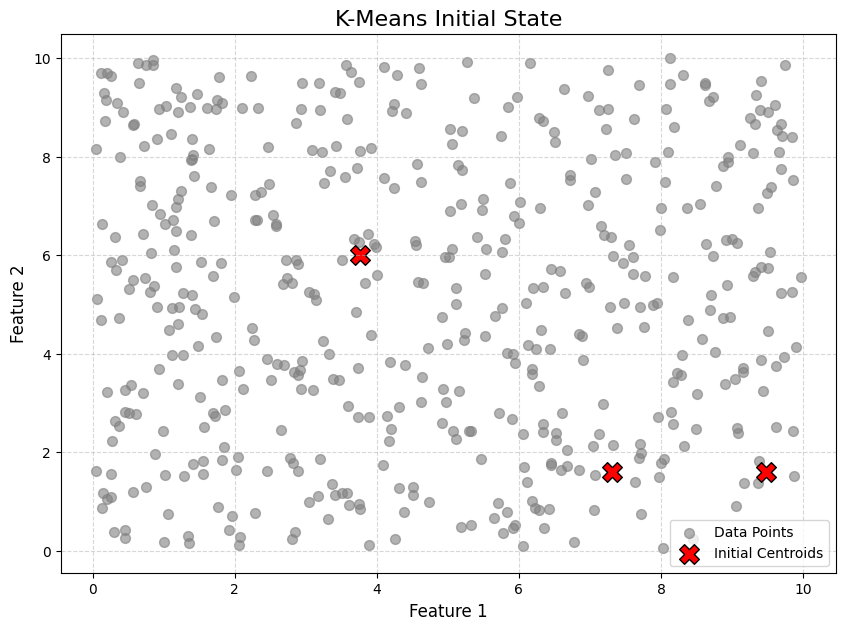

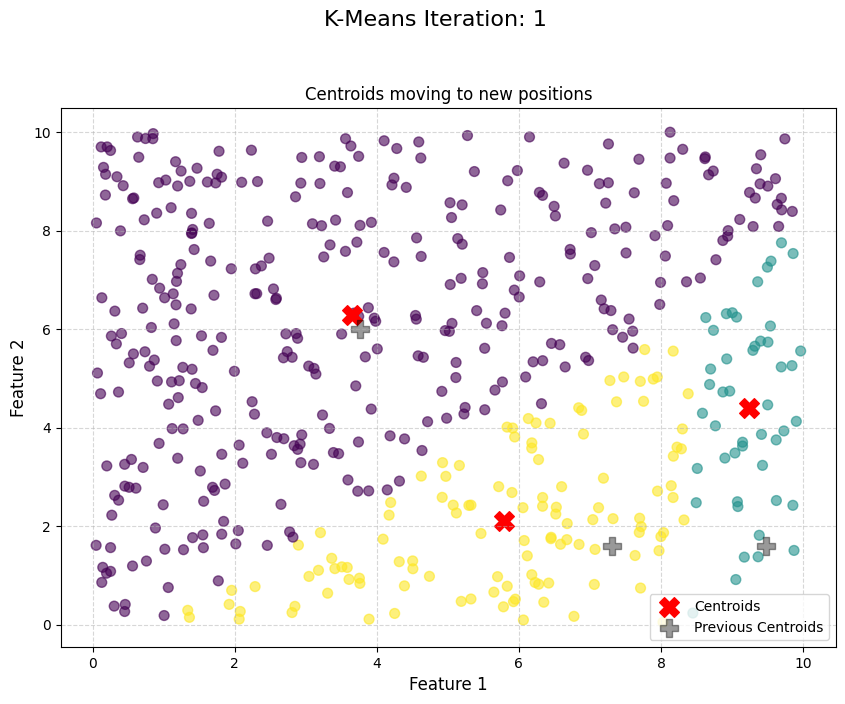

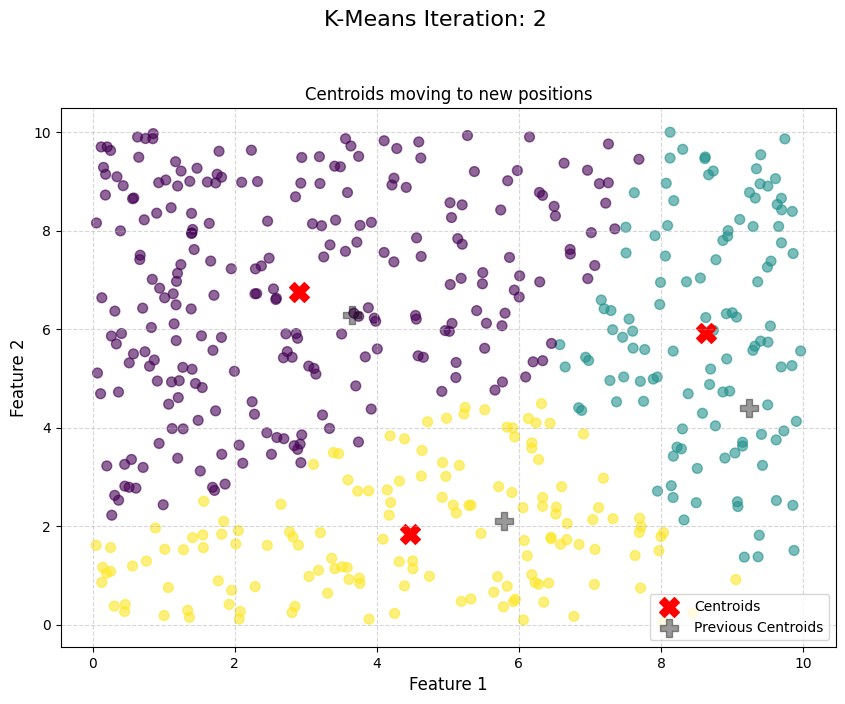

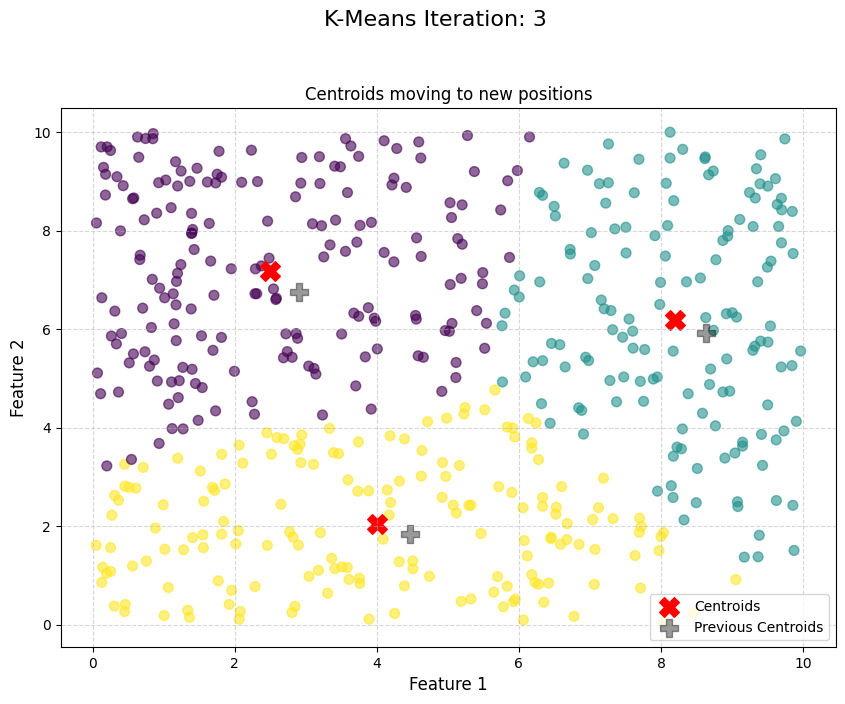

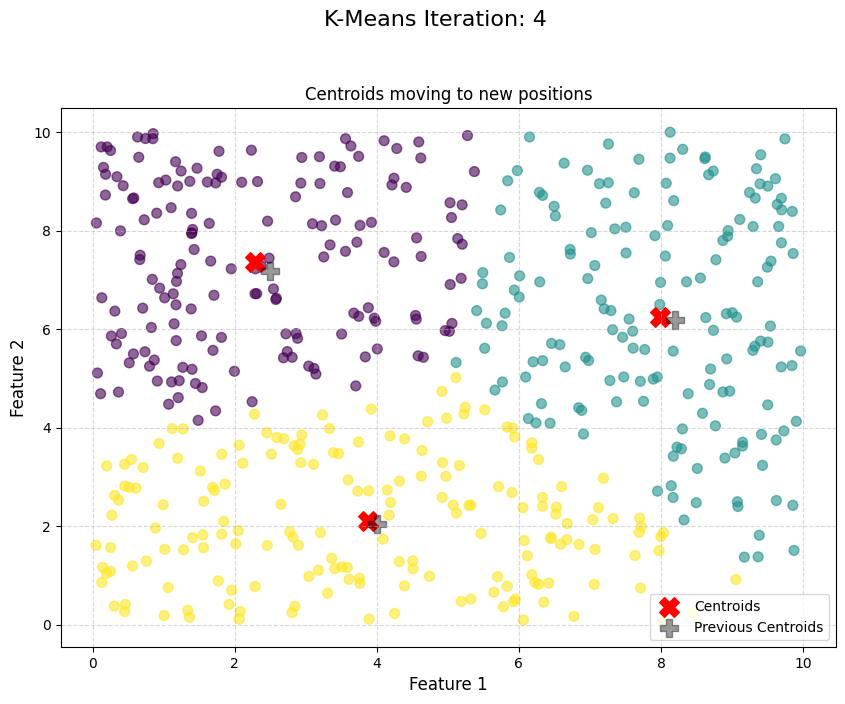

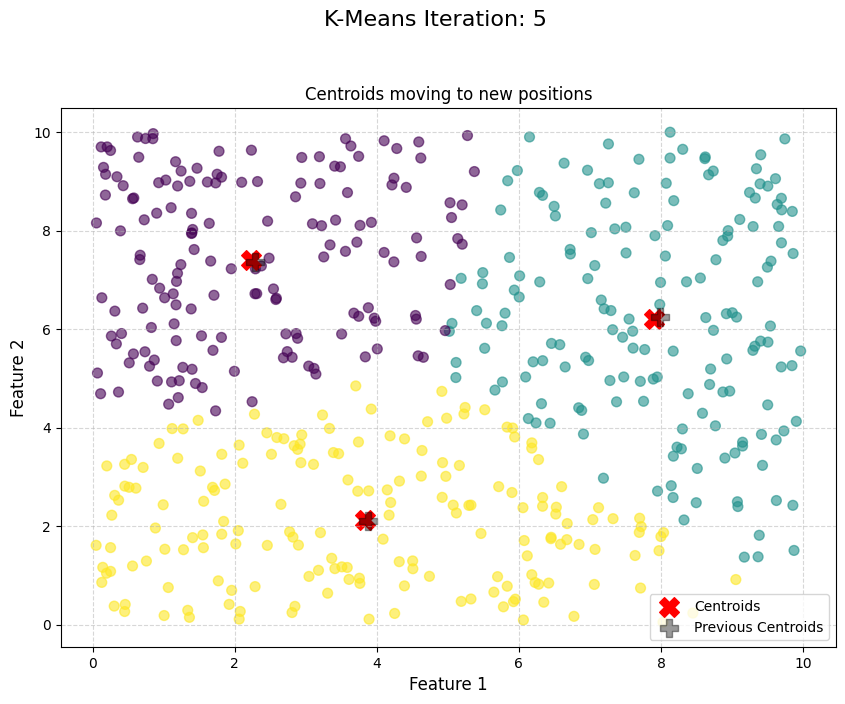

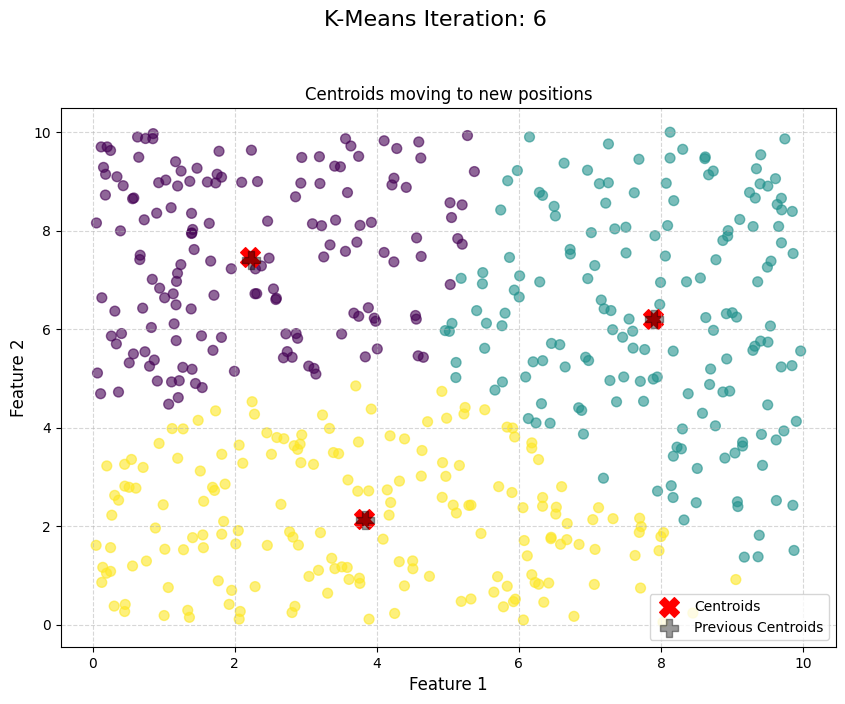

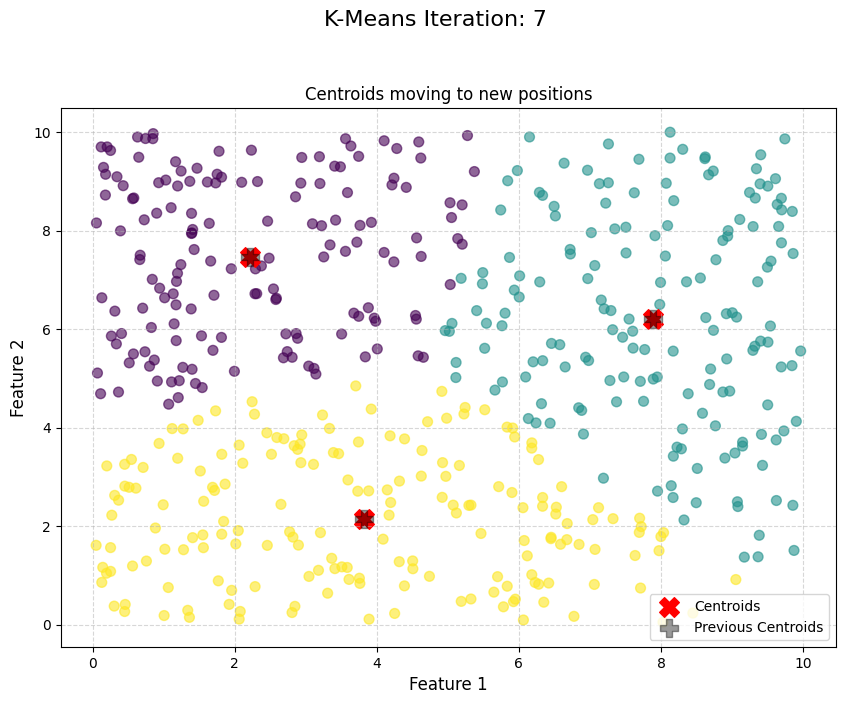


Convergence reached at iteration 7.
K-Means clustering complete.


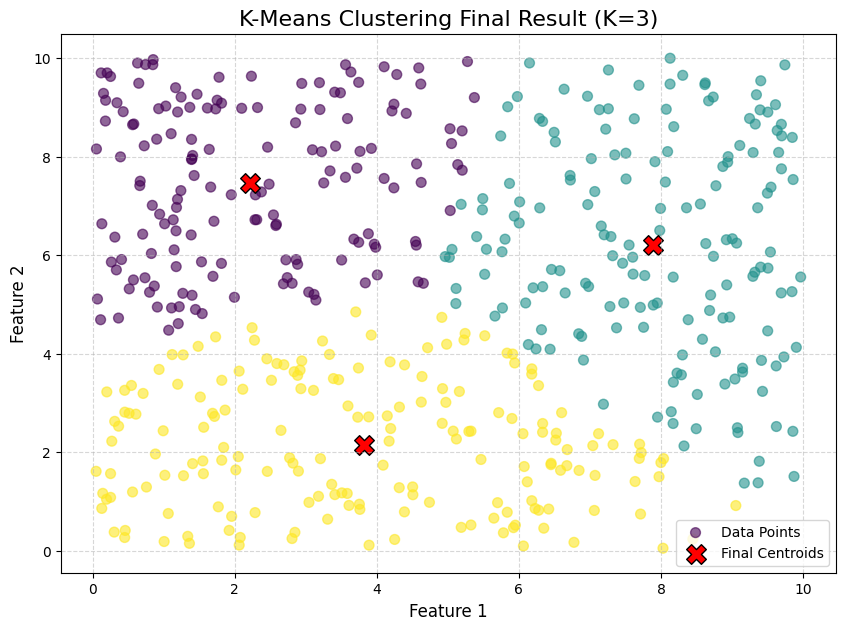

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from IPython.display import clear_output # For clearing plot in loops (e.g., Jupyter)
import time

# --- 1. Configuration ---
K = 3  # Number of clusters
N_SAMPLES = 500
N_FEATURES = 2
MAX_ITERATIONS = 100
CONVERGENCE_TOL = 1e-4  # Tolerance to check for convergence
RANDOM_STATE = 42

# --- 2. Generate Sample Data ---
# Create well-distributed random points instead of blobs
print(f"Generating {N_SAMPLES} well-distributed random data points...")
np.random.seed(RANDOM_STATE) # for reproducible random data
X = np.random.uniform(0, 10, size=(N_SAMPLES, N_FEATURES))


print(f"Generated {N_SAMPLES} data points in {N_FEATURES} dimensions.")
print(f"Targeting K = {K} clusters.")

# --- 3. Initialize Centroids ---
# Find the min and max values for each feature to create random starting points
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)

# Initialize centroids as random points within the data's range
np.random.seed(RANDOM_STATE) # for reproducible random centroids
centroids = np.zeros((K, N_FEATURES))
for i in range(N_FEATURES):
    centroids[:, i] = np.random.uniform(min_vals[i], max_vals[i], size=K)

print("Initial centroids selected randomly from data's value range.")

# --- 4. Main K-Means Loop ---

# 'labels' will store the cluster index for each data point
labels = np.zeros(N_SAMPLES, dtype=int)
iteration = 0
is_converged = False

# We'll use a while loop that runs until convergence or max iterations
plt.ion() # Turn on interactive plotting mode

# Plot initial state before loop starts
fig_initial = plt.figure(figsize=(10, 7))
ax_initial = fig_initial.add_subplot(111)
ax_initial.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6, s=50, label='Data Points')
ax_initial.scatter(centroids[:, 0], centroids[:, 1], 
                   c='red', marker='X', s=200, label='Initial Centroids', edgecolor='black')
ax_initial.set_title("K-Means Initial State", fontsize=16)
ax_initial.set_xlabel("Feature 1", fontsize=12)
ax_initial.set_ylabel("Feature 2", fontsize=12)
ax_initial.legend()
ax_initial.grid(True, linestyle='--', alpha=0.5)
plt.show()
plt.pause(0.5)


while not is_converged and iteration < MAX_ITERATIONS:
    iteration += 1
    
    # --- Assignment Step ---
    # For each point, find the closest centroid
    for i in range(N_SAMPLES):
        # Calculate Euclidean distance from point X[i] to all centroids
        # (x1-x2)^2 = x1^2 - 2*x1*x2 + x2^2
        # We can use np.linalg.norm for a cleaner distance calculation
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        
        # Assign the point to the cluster with the minimum distance
        cluster_index = np.argmin(distances)
        labels[i] = cluster_index

    # --- Update Step ---
    # Store old centroids to check for convergence
    old_centroids = np.copy(centroids)

    # Calculate the new centroids as the mean of all points in the cluster
    for k in range(K):
        # Get all points assigned to this cluster
        points_in_cluster = X[labels == k]
        
        # If a cluster has no points (can happen in rare cases),
        # we don't update its centroid.
        if len(points_in_cluster) > 0:
            centroids[k] = np.mean(points_in_cluster, axis=0)

    # --- Visualization ---
    # Create a new, separate figure for each iteration
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    
    fig.suptitle(f"K-Means Iteration: {iteration}", fontsize=16, y=1.02)

    # Plot data points, colored by their cluster
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)
    
    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], 
               c='red',        # Centroid color
               marker='X',     # Centroid marker
               s=200,          # Centroid size
               label='Centroids')

    # Plot old centroids (to show movement)
    ax.scatter(old_centroids[:, 0], old_centroids[:, 1], 
               c='black',      # Old centroid color
               marker='P',     # Old centroid marker (plus)
               s=150,          # Old centroid size
               alpha=0.4,
               label='Previous Centroids')

    ax.set_title(f"Centroids moving to new positions")
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    
    plt.show()
    plt.pause(0.7) # Pause to make the animation visible

    # --- Convergence Check ---
    # Check the change in centroid positions
    centroid_shift = np.linalg.norm(centroids - old_centroids)
    if centroid_shift < CONVERGENCE_TOL:
        is_converged = True
        print(f"\nConvergence reached at iteration {iteration}.")

if not is_converged:
    print(f"\nReached max iterations ({MAX_ITERATIONS}) without convergence.")

print("K-Means clustering complete.")

# --- 5. Final Plot ---
plt.ioff() # Turn off interactive mode
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', marker='X', s=200, label='Final Centroids', edgecolor='black')
plt.title(f"K-Means Clustering Final Result (K={K})", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [4]:
import imageio.v2 as imageio  # For creating the GIF
import os
import glob

print("--- GIF Creation Script Started ---")

# --- 1. Configuration (Must match the frame generation script) ---
GIF_FILENAME = "kmeans_animation.gif"
FRAME_DIR = "kmeans_frames"
FRAME_DURATION = 0.7 # Duration of each frame in the GIF (in seconds)

# --- 2. Find All Generated Frames ---
# Find all .png files in the frame directory
frame_pattern = os.path.join(FRAME_DIR, "frame_*.png")
# Use glob to find all files matching the pattern and sort them
frame_filenames = sorted(glob.glob(frame_pattern))

if not frame_filenames:
    print(f"Error: No frames found in '{FRAME_DIR}'.")
    print("Please run the 'kmeans_to_gif.py' script first (and make sure it doesn't delete the frames).")
else:
    print(f"Found {len(frame_filenames)} frames to animate.")

    # --- 3. Create GIF ---
    print(f"\nCreating GIF: {GIF_FILENAME}...")
    images = []
    for filename in frame_filenames:
        images.append(imageio.imread(filename))

    # Add the last frame a few extra times so the GIF pauses at the end
    if images: # Check if list is not empty
        for _ in range(3):
            images.append(images[-1])

    imageio.mimsave(GIF_FILENAME, images, duration=FRAME_DURATION)
    print(f"Successfully created {GIF_FILENAME}")

    # --- 4. Cleanup ---
    print("Cleaning up temporary frame files...")
    for filename in frame_filenames:
        try:
            os.remove(filename)
        except OSError as e:
            print(f"Error deleting file {filename}: {e}")
            
    try:
        os.rmdir(FRAME_DIR)
        print(f"Removed directory: {FRAME_DIR}")
    except OSError as e:
        print(f"Error removing directory {FRAME_DIR}: {e}")
        
    print("Cleanup complete.")

--- GIF Creation Script Started ---
Error: No frames found in 'kmeans_frames'.
Please run the 'kmeans_to_gif.py' script first (and make sure it doesn't delete the frames).


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import time
import imageio.v2 as imageio  # For creating the GIF
import os

# --- 1. Configuration ---
K = 3  # Number of clusters
N_SAMPLES = 500
N_FEATURES = 2
MAX_ITERATIONS = 100
CONVERGENCE_TOL = 1e-4  # Tolerance to check for convergence
RANDOM_STATE = 42

GIF_FILENAME = "kmeans_animation.gif"
FRAME_DIR = "kmeans_frames"
FRAME_DURATION = 0.7 # Duration of each frame in the GIF (in seconds)

# --- 2. Setup Frame Storage ---
if not os.path.exists(FRAME_DIR):
    os.makedirs(FRAME_DIR)
print(f"Saving frames to '{FRAME_DIR}/'")

frame_filenames = [] # List to store the paths of saved plot images

# --- 3. Generate Sample Data ---
print(f"Generating {N_SAMPLES} well-distributed random data points...")
np.random.seed(RANDOM_STATE) # for reproducible random data
X = np.random.uniform(0, 10, size=(N_SAMPLES, N_FEATURES))

print(f"Generated {N_SAMPLES} data points in {N_FEATURES} dimensions.")
print(f"Targeting K = {K} clusters.")

# --- 4. Initialize Centroids ---
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)
np.random.seed(RANDOM_STATE)
centroids = np.zeros((K, N_FEATURES))
for i in range(N_FEATURES):
    centroids[:, i] = np.random.uniform(min_vals[i], max_vals[i], size=K)
print("Initial centroids selected randomly from data's value range.")

# --- 5. Main K-Means Loop ---
labels = np.zeros(N_SAMPLES, dtype=int)
iteration = 0
is_converged = False

# --- Plot and save initial state ---
fig_initial = plt.figure(figsize=(10, 7))
ax_initial = fig_initial.add_subplot(111)
ax_initial.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6, s=50, label='Data Points')
ax_initial.scatter(centroids[:, 0], centroids[:, 1], 
                   c='red', marker='X', s=200, label='Initial Centroids', edgecolor='black')
ax_initial.set_title("K-Means Initial State", fontsize=16)
ax_initial.set_xlabel("Feature 1", fontsize=12)
ax_initial.set_ylabel("Feature 2", fontsize=12)
ax_initial.legend()
ax_initial.grid(True, linestyle='--', alpha=0.5)

# Save the initial frame
frame_path = os.path.join(FRAME_DIR, f"frame_000.png")
fig_initial.savefig(frame_path)
frame_filenames.append(frame_path)
plt.close(fig_initial) # Close the plot to save memory
print("Saved initial frame.")


while not is_converged and iteration < MAX_ITERATIONS:
    iteration += 1
    print(f"Running iteration {iteration}...")
    
    # --- Assignment Step ---
    for i in range(N_SAMPLES):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        labels[i] = np.argmin(distances)

    # --- Update Step ---
    old_centroids = np.copy(centroids)
    for k in range(K):
        points_in_cluster = X[labels == k]
        if len(points_in_cluster) > 0:
            centroids[k] = np.mean(points_in_cluster, axis=0)

    # --- Visualization (Save to File) ---
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    fig.suptitle(f"K-Means Iteration: {iteration}", fontsize=16, y=1.02)
    
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)
    ax.scatter(centroids[:, 0], centroids[:, 1], 
               c='red', marker='X', s=200, label='Centroids')
    ax.scatter(old_centroids[:, 0], old_centroids[:, 1], 
               c='black', marker='P', s=150, alpha=0.4, label='Previous Centroids')
    
    ax.set_title(f"Centroids moving to new positions")
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Save the iteration frame
    frame_path = os.path.join(FRAME_DIR, f"frame_{iteration:03d}.png")
    fig.savefig(frame_path)
    frame_filenames.append(frame_path)
    plt.close(fig) # Close the plot to save memory

    # --- Convergence Check ---
    centroid_shift = np.linalg.norm(centroids - old_centroids)
    if centroid_shift < CONVERGENCE_TOL:
        is_converged = True
        print(f"\nConvergence reached at iteration {iteration}.")

if not is_converged:
    print(f"\nReached max iterations ({MAX_ITERATIONS}) without convergence.")

print("K-Means clustering complete.")

# --- 6. Final Plot (and save) ---
print("Saving final plot...")
fig_final = plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', marker='X', s=200, label='Final Centroids', edgecolor='black')
plt.title(f"K-Means Clustering Final Result (K={K})", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Save the final frame
frame_path = os.path.join(FRAME_DIR, f"frame_{iteration+1:03d}.png")
fig_final.savefig(frame_path)
frame_filenames.append(frame_path)
plt.close(fig_final)

# Also show the final plot in the interactive window
plt.show() 

# --- 7. Create GIF ---
print(f"\nCreating GIF: {GIF_FILENAME}...")
images = []
for filename in frame_filenames:
    images.append(imageio.imread(filename))

# Add the last frame a few extra times so the GIF pauses at the end
for _ in range(3):
    images.append(imageio.imread(frame_filenames[-1]))

imageio.mimsave(GIF_FILENAME, images, duration=FRAME_DURATION)
print(f"Successfully created {GIF_FILENAME}")

# --- 8. Cleanup ---
print("Cleaning up temporary frame files...")
for filename in frame_filenames:
    os.remove(filename)
os.rmdir(FRAME_DIR)
print("Cleanup complete.")

Saving frames to 'kmeans_frames/'
Generating 500 well-distributed random data points...
Generated 500 data points in 2 dimensions.
Targeting K = 3 clusters.
Initial centroids selected randomly from data's value range.
Saved initial frame.
Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...

Convergence reached at iteration 7.
K-Means clustering complete.
Saving final plot...

Creating GIF: kmeans_animation.gif...
Successfully created kmeans_animation.gif
Cleaning up temporary frame files...
Cleanup complete.
